<a href="https://colab.research.google.com/github/BhoomikaSheth/Data-Analysis-Projects/blob/main/time_series_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Satement

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:

* Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
* Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
* Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.
* Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
* Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
#df = pd.read_csv("fcc-forum-pageviews.csv",index_col="date")
df=pd.read_csv("https://drive.google.com/uc?export=download&id=1ryIIfmqrVO-XtyuCmMe6gISndFh4RAwV")
# Clean data
df=df.loc[df["value"]>df["value"].quantile(0.025)]
df=df.loc[df["value"]<df["value"].quantile(0.975)]
df=df.dropna()
print(df.head())
def draw_line_plot():
    # Draw line plot
    plt.figure(figsize=(15,5))
    plt.plot(df.index,df.value,color="red")
    plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    plt.xlabel("Date")
    plt.ylabel("Page Views")
    # Save image and return fig (don't change this part)
    fig=plt.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar=df.reset_index()
    df_bar["date"]=pd.to_datetime(df_bar["date"])
    df_bar["year"]=df_bar["date"].dt.year
    df_bar["month"]=df_bar["date"].dt.month
    df_bar["month_name"]=df_bar["date"].dt.month_name()
    # Draw bar plot
    temp=df_bar.groupby(by=["year","month"]).mean().unstack().plot.bar(figsize=(15,5))
    #df_bar_group.groups.keys()
    temp.set_xlabel("Years")
    temp.set_ylabel("Average Page Views")
    fig=temp.get_figure()
    # Save image and return fig (don't change this part)
    #fig=plt.savefig('bar_plot.png')
    #return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box["date"]=pd.to_datetime(df_box["date"])
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)

    fig,(ax0,ax1)=plt.subplots(1,2,figsize=(16,5))
    sns.boxplot(x="year",y="value",data=df_box,ax=ax0)
    ax0.set_title("Year-wise Box Plot (Trend)")
    ax0.set(xlabel="Year",ylabel="Page Views")
    sns.boxplot(x="month",y="value",data=df_box,ax=ax1,order=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
    ax1.set_title("Month-wise Box Plot (Seasonality)")
    ax1.set(xlabel="Month",ylabel="Page Views")



    # Save image and return fig (don't change this part)
    fig=plt.savefig('box_plot.png')
    return fig


          date  value
10  2016-05-19  19736
17  2016-05-26  18060
18  2016-05-27  19997
19  2016-05-28  19044
20  2016-05-29  20325


In [3]:
# refer to fcc-forum-pageviews.csv
#https://drive.google.com/uc?export=download&id=1ryIIfmqrVO-XtyuCmMe6gISndFh4RAwV

#figures:
#https://drive.google.com/uc?export=download&id=1TQmNWEuMTh0lpUv3sY6xEWaSZS4aBdDZ
#https://drive.google.com/uc?export=download&id=1ObOVnUTehlU9jXmxUXIjo_2zMSOHmoET

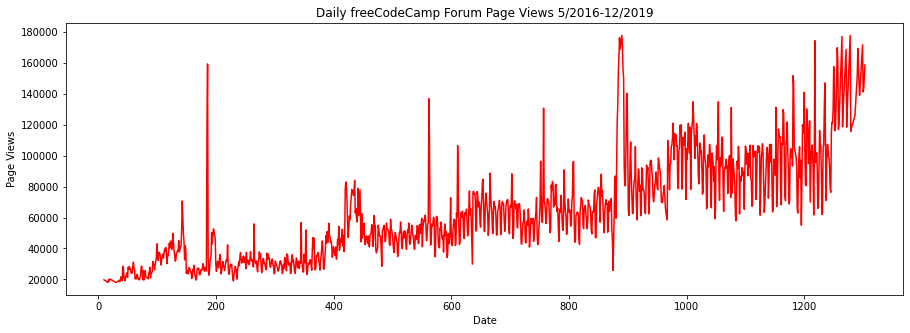

In [17]:
draw_line_plot()

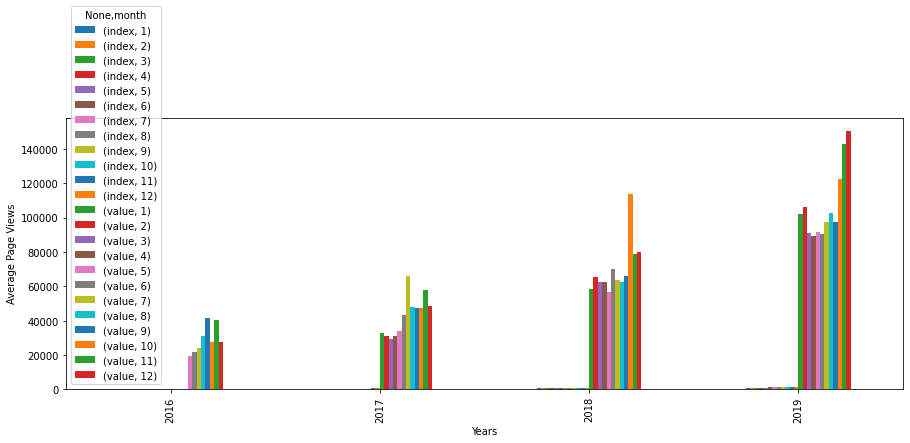

In [22]:
draw_bar_plot()

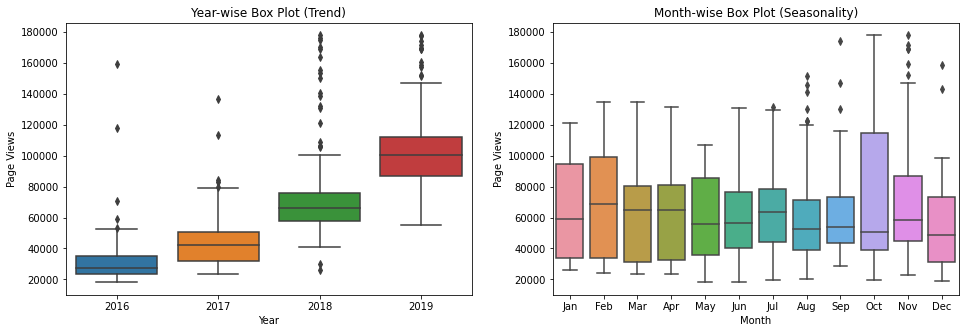

In [25]:
draw_box_plot()